# Project: Datascience blog post for Bakery analysis

## Datascience Process

In this bakery analysis project we go through the datascience CRISP-DM process.The dataset we have will undergo all the 6 steps of datascience process which are 
<ul>-Gathering the data</ul>
<ul>-Assessing the data</ul>
<ul>-Cleaning the data</ul>
<ul>-Analyzing the data</ul>
<ul>-Modeling the data</ul>
<ul>-Visualizing the data</ul>

Lets start our process from here.

## Gathering the data

### Importing dataset and libraries

 Data set: BreadBasket_DMS.csv <br>
 Library :pandas,numpy,io,matplot,seaborn <br>
 Data credit: Kaggle <br>
 Brief description: This csv file has the customer details and the sales information.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
print(f'Libraries loaded!')

Libraries loaded!


In [2]:
# Open and Creating the dataset
df_initial = pd.read_csv('BreadBasket_DMS.csv', header = 0)
df_initial.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

So the required data for the project are gathered and ready for assessment with all the required libraries loaded.

## Assessing the data

With all the data imported now we are assessing the data for their type,column and their null values.

In [3]:
# Dataset info
display(df_initial.info())

# Descriptive statistics of the data
display(df_initial.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


None

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

All the properties of the data have been assessed and we are ready to clean the data.

## Cleaning the data

### Identifying the missing values
We are trying to identify the missing values on the dataset which will help us decide further and filling gaps for our analysis.


In [4]:
# Identify missing values on dataset
print('  ' * 10 + " Display information about column types and number of null values " + '  ' * 10 )
print('--' * 50)

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))

if(any(df_initial.isnull().any())):
    print()
    display(tab_info)
else:
    print('NO missing data')

                     Display information about column types and number of null values                     
----------------------------------------------------------------------------------------------------
NO missing data


C:\Users\priya\AppData\Local\Temp\ipykernel_74312\567845142.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
C:\Users\priya\AppData\Local\Temp\ipykernel_74312\567845142.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))


From the above code we identify that there are no missing data.

### Identifying the 'hidden' missing values


In [5]:
#Let's check the 'hidden' missing values in the dataset
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]

print('---------------------------------------------------------')
print("There are {0} 'hidden' missing values in the 'Item'column.".format(len(df_initial[df_initial.Item.isin(missing_value)])))
print("There are {0} 'hidden' missing values in the 'Transaction'.".format(len(df_initial[df_initial.Transaction.isin(missing_value)])))
print('---------------------------------------------------------')
df_initial[df_initial.Item.isin(missing_value)].head()

---------------------------------------------------------
There are 786 'hidden' missing values in the 'Item'column.
There are 0 'hidden' missing values in the 'Transaction'.
---------------------------------------------------------


Date      Time  Transaction  Item
26  2016-10-30  10:27:21           11  NONE
38  2016-10-30  10:34:36           15  NONE
39  2016-10-30  10:34:36           15  NONE
66  2016-10-30  11:05:30           29  NONE
80  2016-10-30  11:37:10           37  NONE

From the above code we understand that there are 786 hidden missing values like "NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0 in the column "ITEM" and 0 missing values in thr column "Transaction"
### Dropping the missing values

In [6]:
# Selecting the row values to drop in the selected column
bread = df_initial.drop(df_initial[df_initial.Item == "NONE"].index)
print("Number of rows: {0:,} (original 21,293) ".format(len(bread)))
print('----------------------------------------')
bread.head()

# After removing the missing values, the number of rows left is 20,507 (original 21,293 minus 786 missing)

Number of rows: 20,507 (original 21,293) 
----------------------------------------


Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

So from the above output we understand that 20507 rows containing missing hidden values have been dropped.

## Analyzing and Modeling the data

### Creating a column for our analysis
To make a clear analysis we are creating a column DateTimeIndex which concatenates the date and time.

In [7]:
# Creating a column of DateTimeIndex
bread['Datetime'] = pd.to_datetime(bread['Date'] + ' ' + bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head()

Transaction           Item
Datetime                                       
2016-10-30 09:58:11            1          Bread
2016-10-30 10:05:34            2   Scandinavian
2016-10-30 10:05:34            2   Scandinavian
2016-10-30 10:07:57            3  Hot chocolate
2016-10-30 10:07:57            3            Jam

Here is the new column Datetime created with concatenating the date and time.
### Extracting information for further analysis
Now we are extracting hour of the day and weekday of the week .The day of the week are Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7

In [8]:
# Extract hour of the day and weekday of the week
# For Datetimeindex: the day of the week are Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday + 1

bread.head()

Transaction           Item  Hour  Weekday
Datetime                                                      
2016-10-30 09:58:11            1          Bread     9        7
2016-10-30 10:05:34            2   Scandinavian    10        7
2016-10-30 10:05:34            2   Scandinavian    10        7
2016-10-30 10:07:57            3  Hot chocolate    10        7
2016-10-30 10:07:57            3            Jam    10        7

With this analysis we understand the sales in an hour in a day clearly which will be helpful for our later analysis.
### Analysing sales details
Here we are trying to understand the items sold in the bakery ,total sales and average daily sales.

In [9]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = int(total_items / total_days)
unique_items = bread.Item.unique().size

print("Total unique_items: {} sold by the Bakery".format(unique_items))
print('-----------------------------')
print("Total sales: {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print('-----------------------------')
print("Average_items daily sales: {}".format(average_items))

Total unique_items: 94 sold by the Bakery
-----------------------------
Total sales: 20507 items sold in 159 days throughout 7 months
-----------------------------
Average_items daily sales: 128


Above data says that 94 unique items are there in the bakery.The total sales are 20507 items sold through out 159 days in 7 months and their avarage daily sales is 128.

## Q1.Top 10 selling Items

From our analysis we are trying to understand the top 10 selling items

In [10]:
# Rank the top 10 best-selling items
counts = bread.Item.value_counts()
percent = bread.Item.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
top_10 = pd.DataFrame({'counts': counts, '%': percent})[:10]

print('-----------------------------')
print('Top 10 items')
print('-----------------------------')
display(top_10)

-----------------------------
Top 10 items
-----------------------------


counts      %
Coffee           5471  26.7%
Bread            3325  16.2%
Tea              1435   7.0%
Cake             1025   5.0%
Pastry            856   4.2%
Sandwich          771   3.8%
Medialuna         616   3.0%
Hot chocolate     590   2.9%
Cookies           540   2.6%
Brownie           379   1.8%

Coffee,Bread,Tea,cake,pastry,sandwitch,medialuna,hot chocolate ,cookies and brownie always remain the best selling items irrespective of percentage or number.So in order to run a bakery thier primary focus should have these top 10 selling items.

## Visualization of data
We here use a function for barchart and docstring explaining for better visualization and understanding of the top 10 selling items by percentage and value.

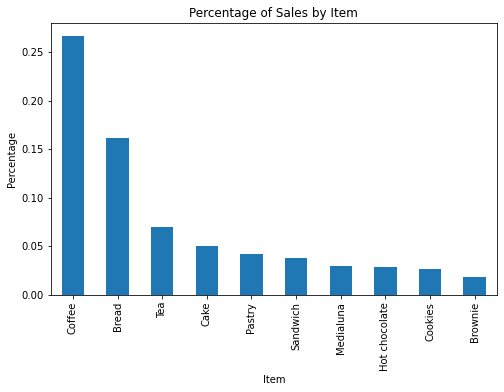

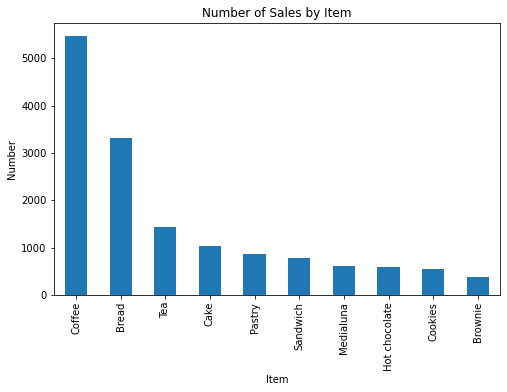

In [11]:
def ranking(boolean,axis):
    '''
    This function provides a barchart of top 10 selling items in the bakery.
    This is shown by percentage and number of items sold in the bakery.
    Input:col1(boolean),col2(axis)
    Output:Barchart of percentage and number of items sold in the bakery.
    '''
    plt.figure(figsize=(8,5))
    bread.Item.value_counts(normalize=boolean)[:10].plot(kind="bar", title=axis+" of Sales by Item").set(xlabel="Item", ylabel=axis)
    plt.show()
    
ranking(True,"Percentage")
ranking(False,"Number")


The above barchart shows the visualization and understanding of the top 10 selling items by percentage and value.

## Q2.Number of items sold in a date,month and hour

For our next question we made a chart based on the number of items sold in a day month and hour.

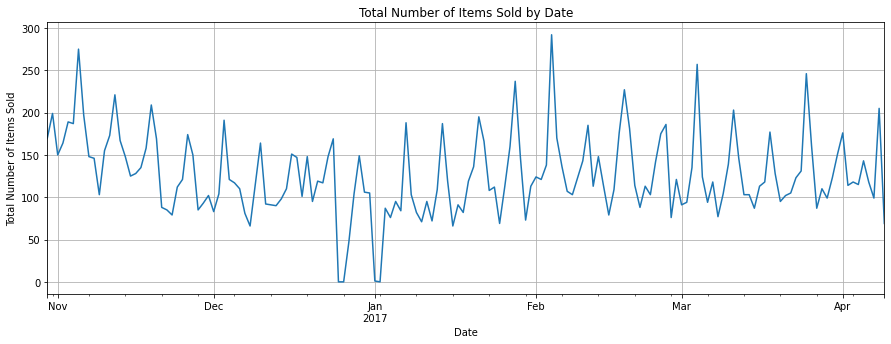

In [12]:
# Number of items sold by day
bread["Item"].resample("D").count().plot(figsize=(15,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

This is the chart showing the items sold by date
The below line graph shows the number of items sold by month.

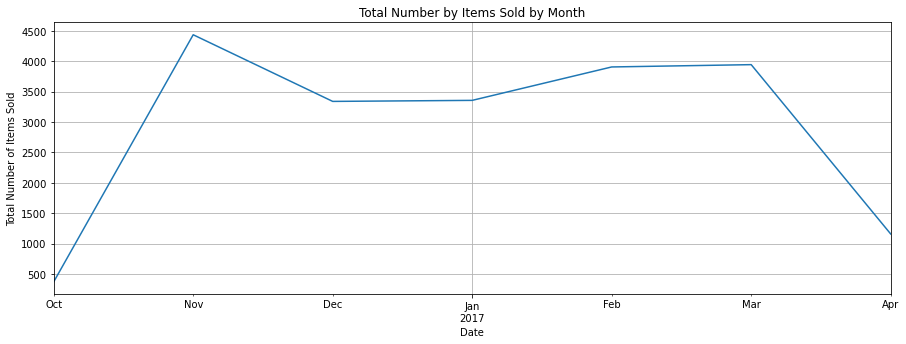

In [13]:
# Number of items sold by month
bread["Item"].resample("M").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

The below line graph shows the number of items sold by hour

           Item
Hour           
1      0.006289
7      0.150943
8      4.056604
9     12.364780
10    16.767296
11    19.509434
12    17.949686
13    16.459119
14    16.603774
15    13.301887
16     8.446541
17     2.314465
18     0.515723
19     0.301887
20     0.138365
21     0.018868
22     0.050314
23     0.018868


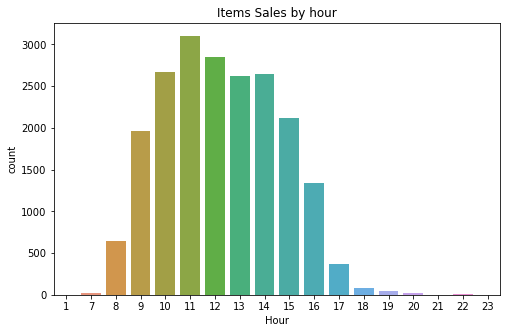

In [14]:
# Aggregate item sold by hour
bread_groupby_hour = bread.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
print(bread_groupby_hour)

# Plot items sold by hour
plt.figure(figsize=(8,5))
sns.countplot(x='Hour',data=bread)
plt.title('Items Sales by hour')
plt.show()

The above line graph shows the number of items sold by hour and it says lunch time are peak time in sales which they should focus more.
## Q3.Sales by weekday
Now for our question 3 we are trying to find the sales by each weekday and thier average sales.So first we groupby sales on each weekday then ind out how many in each weekday period of transaction in order to calculate the average items per weekday and then calculate the average items for each weekday.

In [15]:
# sales groupby weekday
bread_groupby_weekday = bread.groupby("Weekday").agg({"Item": lambda item: item.count()})
bread_groupby_weekday.head()

Item
Weekday      
1        2324
2        2392
3        2321
4        2646
5        3124

In [16]:
# but we need to find out how many in each weekday period of transaction
# in order to calculate the average items per weekday

import datetime 
daterange = pd.date_range(datetime.date(2016, 10, 30), datetime.date(2017, 4, 9))

monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(bread.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday

print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


In [17]:
# apply the conditions to calculate the average items for each weekday
conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/21, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday

Item     Average
Weekday                  
1        2324  110.666667
2        2392  104.000000
3        2321  100.913043
4        2646  115.043478
5        3124  135.826087
6        4605  200.217391
7        3095  134.565217

Now we visualize the sales by weekday in chart which will help to understand better.

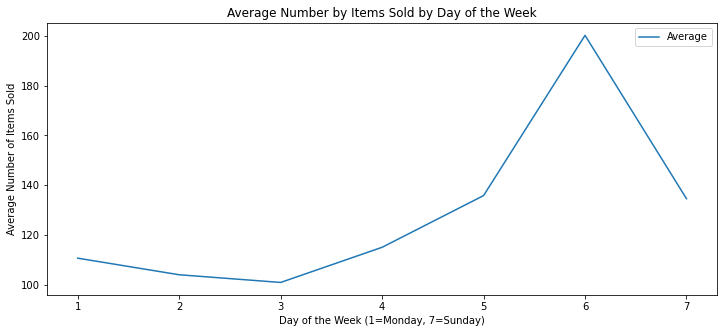

In [18]:
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")
plt.show()

As weekend(friday,saturday and sunday) shows more in sales, the bakery can produce more in those days and reduce in the others days which will help in reduce loss. Another strategy is giving promotions in week days alone to increase the sales and attract more customers.